# Pilot Project Week3
> 4기 윤다빈

## 데이터 불러오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients.xls


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("default of credit card clients.xls", header=1, index_col='ID')

In [ ]:
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

### 결측치 확인

In [ ]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500
std,129747.661567,0.489129,0.790349,0.521970,9.217904
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [ ]:
df['EDUCATION'].value_counts().sort_index()

,count
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


In [ ]:
df['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
0,54
1,13659
2,15964
3,323


> 데이터셋에 존재하는 오류는 잘못된 속성을 수정하거나, 오류와 관련된 행을 삭제함으로써 해결할 수 있음. 보수적인 접근을 취해 문서화되지 않은 범주들을 ‘기타(others)’로 묶을 수도 있지만, 이상치에 해당하는 항목이 전체의 1.33%인 399건으로 비교적 적기 때문에 이를 제거하기로 결정.

In [ ]:
# remove useless and incorrect information
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")

# Alternative
# df['MARRIAGE'] = np.where(df['MARRIAGE']==0, 3, df['MARRIAGE'])
# df['EDUCATION'] = np.where(df['EDUCATION']==0, 4, df['EDUCATION'])
# df['EDUCATION'] = np.where(df['EDUCATION']==5, 4, df['EDUCATION'])
# df['EDUCATION'] = np.where(df['EDUCATION']==6, 4, df['EDUCATION'])

Dataset size before:	30000
Dataset size after:	29601


### 2.2.2 History of Past Payments

`PAY_n` 의 범위 : -2부터 8

In [ ]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

### 2.2.3 Amount of Bill Statement and Previous Payment

**청구서 금액과 이전의 지불 금액**

In [ ]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


### Data Exploration

**변수들과 타겟인 `DEFAULT`의 관계를 알아보자**

In [ ]:
df['DEFAULT'].value_counts()

,count
DEFAULT,
0,22996
1,6605


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-598268218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph_target = sns.countplot(x="DEFAULT", data=df, palette=['#77DD76','#FF6962'])


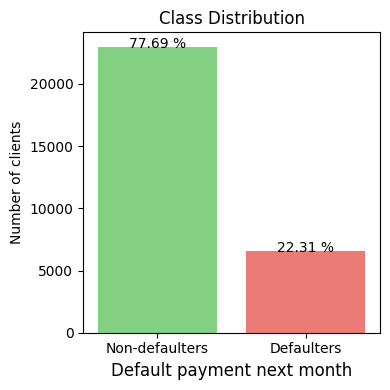

In [ ]:
# Class distribution
plt.figure(figsize = (4,4))
graph_target = sns.countplot(x="DEFAULT", data=df, palette=['#77DD76','#FF6962'])

i=0
for p in graph_target.patches:
    height = p.get_height()

    percentage = round(100 * df["DEFAULT"].value_counts()[i] / len(df),2)

    str_plot = f'{percentage} %'

    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1

plt.title('Class Distribution')
plt.xticks([0,1],['Non-defaulters', 'Defaulters'])
plt.xlabel('Default payment next month', fontsize=12)
plt.ylabel('Number of clients')
plt.tight_layout()


plt.show()

- 위의 그림은 `LIMIT_BAL' 변수에 대해 채무 불이행 여부에 따른 밀도 분포도를 그린 결과
- 주어진 신용 한도가 특정 금액 이하일 때 연체 확률이 비연체 확률보다 더 크다.
- 시사점 : **신용 한도가 낮은 사람일수록 연체 가능성이 높고, 신용 한도가 높은 사람일수록 연체 가능성이 낮음**

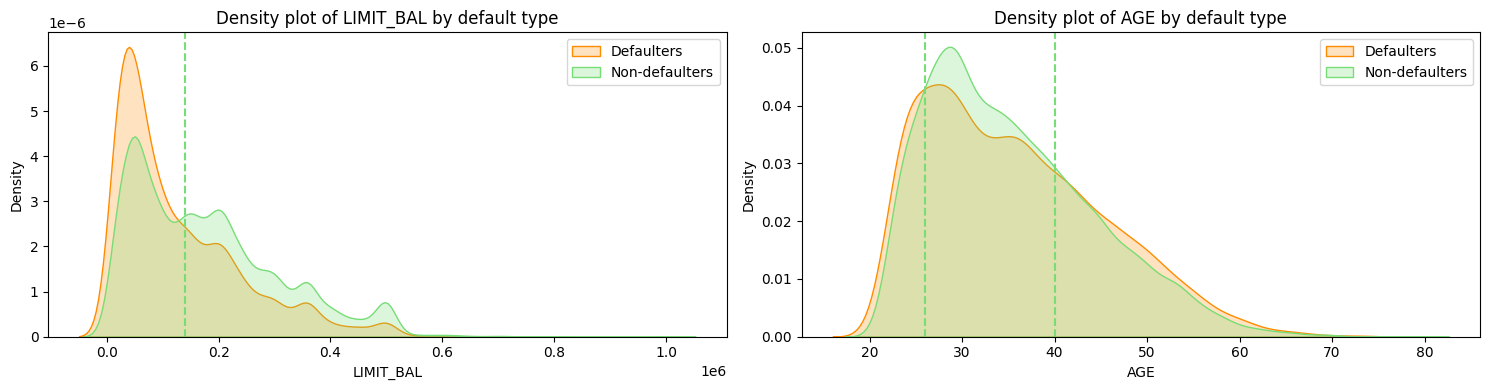

In [ ]:
# Kernel density distribution
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.show()

**[ `AGE` 시각화 결과 ]**
- 25세에서 40세 사이의 연령대에서 비연체 확률이 더 높게 나옴.
- 해당 연령대 소비자들이 신용카드 대출을 상환할 능력이 더 크다는 것을 의미. -> 개인들의 직장과 가정이 비교적 안정되어 있기 때문이라고 예측 가능

/tmp/ipython-input-1696724946.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Male', 'Female'])
/tmp/ipython-input-1696724946.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
/tmp/ipython-input-1696724946.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Married', 'Single', 'Others'])


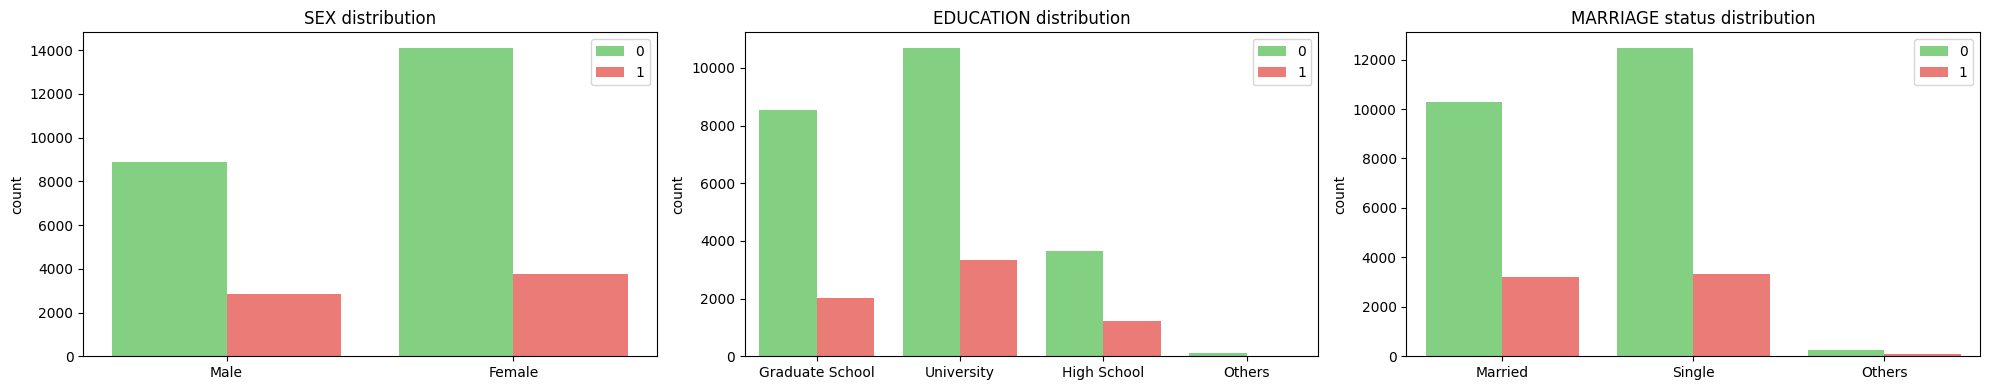

In [ ]:
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].set_title('SEX distribution')
sns.countplot(x='SEX', hue='DEFAULT', data=df, ax=axs[0])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].set_xlabel('')
axs[0].legend()

axs[1].set_title('EDUCATION distribution')
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df, ax=axs[1])
axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
axs[1].set_xlabel('')
axs[1].legend()

axs[2].set_title('MARRIAGE status distribution')
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df, ax=axs[2])
axs[2].set_xticklabels(['Married', 'Single', 'Others'])
axs[2].set_xlabel('')
axs[2].legend()

fig.tight_layout()
plt.show()

/tmp/ipython-input-3743428883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='muted')
/tmp/ipython-input-3743428883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='muted')
/tmp/ipython-input-3743428883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='muted')
/tmp/ipython-input-3743428883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

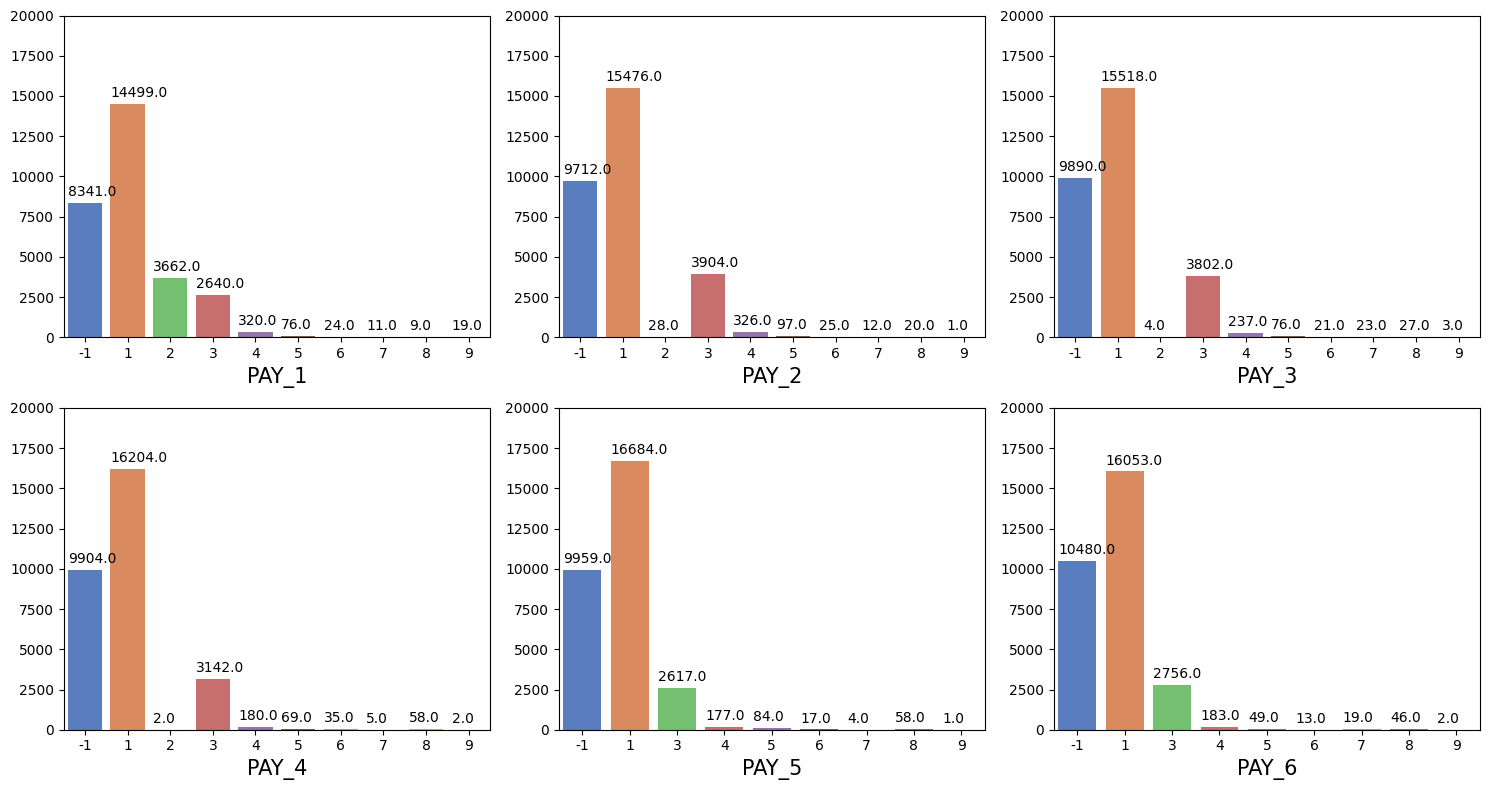

In [ ]:
PAY_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15, 8))

for i, col in enumerate(PAY_cols):
    ax = plt.subplot(2, 3, i + 1)
    ax = sns.countplot(x=col, data=df, palette='muted')
    plt.ylim(0, 20000)  # 필요 시만 사용

    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel('')

    # 막대에 값 표시(범주가 많으면 성능 저하)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x(), height), xytext=(0, 5),
                    textcoords='offset points', fontsize=10)

plt.tight_layout()   # 루프 밖에서 한 번만
plt.show()

/tmp/ipython-input-3309374772.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default',color='#77DD76', shade=True)
/tmp/ipython-input-3309374772.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', color='#FF6962', shade=True)
/tmp/ipython-input-3309374772.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default',color='#77DD76', shade=True)
/tmp/ipython-input-3309374772.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will

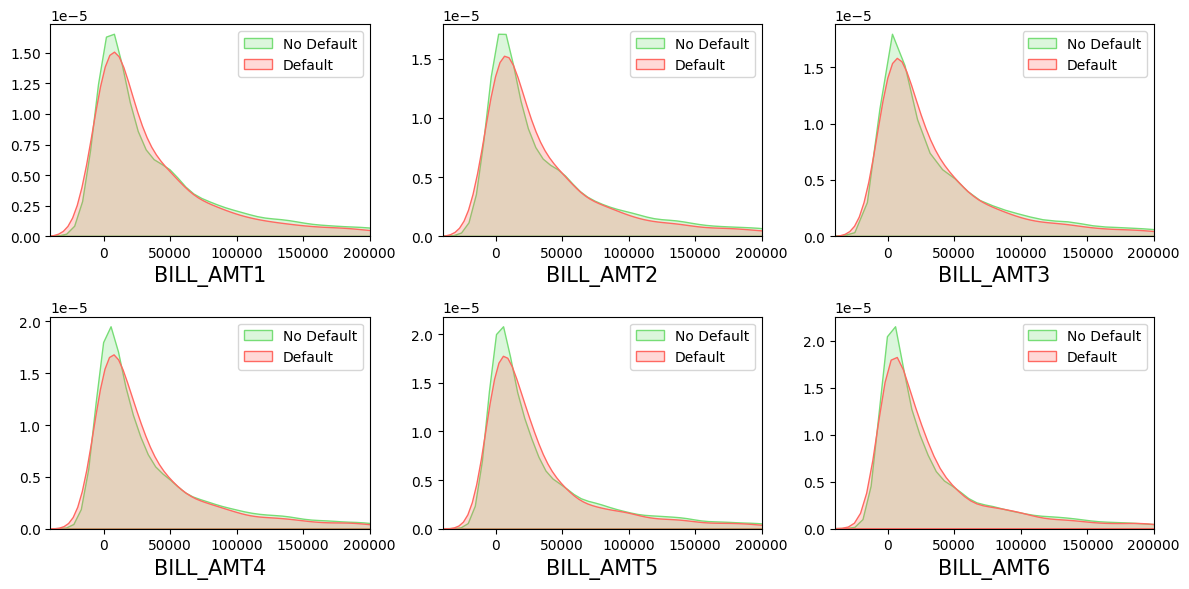

In [ ]:
BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(BILL_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default',color='#77DD76', shade=True)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', color='#FF6962', shade=True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()

/tmp/ipython-input-2873942090.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
/tmp/ipython-input-2873942090.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', shade = True, color='#FF6962')
/tmp/ipython-input-2873942090.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
/tmp/ipython-input-2873942090.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
Thi

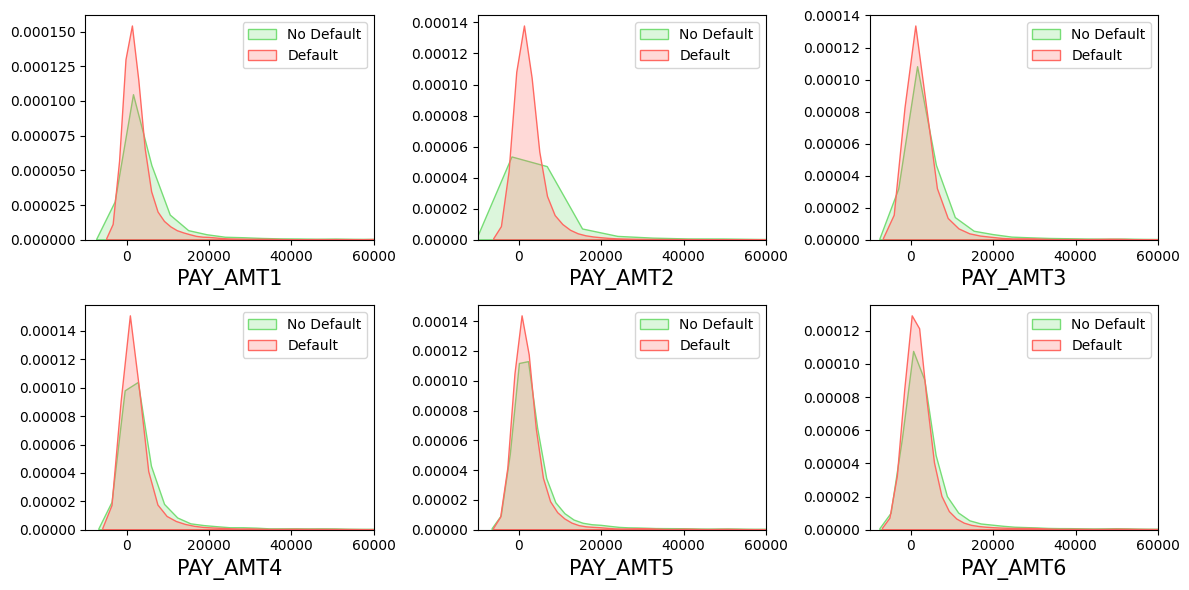

In [ ]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', shade = True, color='#FF6962')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

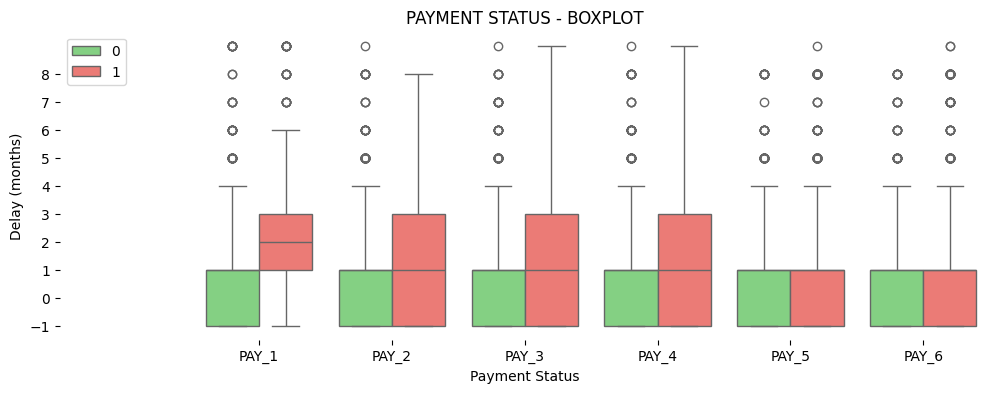

In [ ]:
import numpy as np

repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]
repayment = pd.melt(repayment,
                    id_vars="DEFAULT",
                    var_name="Payment Status",
                    value_name='Delay (months)')


plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="DEFAULT", data=repayment, palette=sns.color_palette(('#77DD76','#FF6962')))
plt.xlim([-1.5,5.5])
plt.ylim([-1.5,9.5])
plt.yticks(np.arange(-1,9))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend()
plt.box(False)

결제 상태 변수들의 분포를 박스플롯으로 확인한 결과, 결제를 한 달 이내로 지연하는 고객은 신용카드 채무 불이행 가능성이 상대적으로 낮은 것으로 확인되었다.
> 9월 상환 상태 (PAY_1)는 다른 기간의 상환 상태 변수들에 비해 더 큰 판별력을 지니는 것으로 나타남

### 2.4 변수간의 상관관계

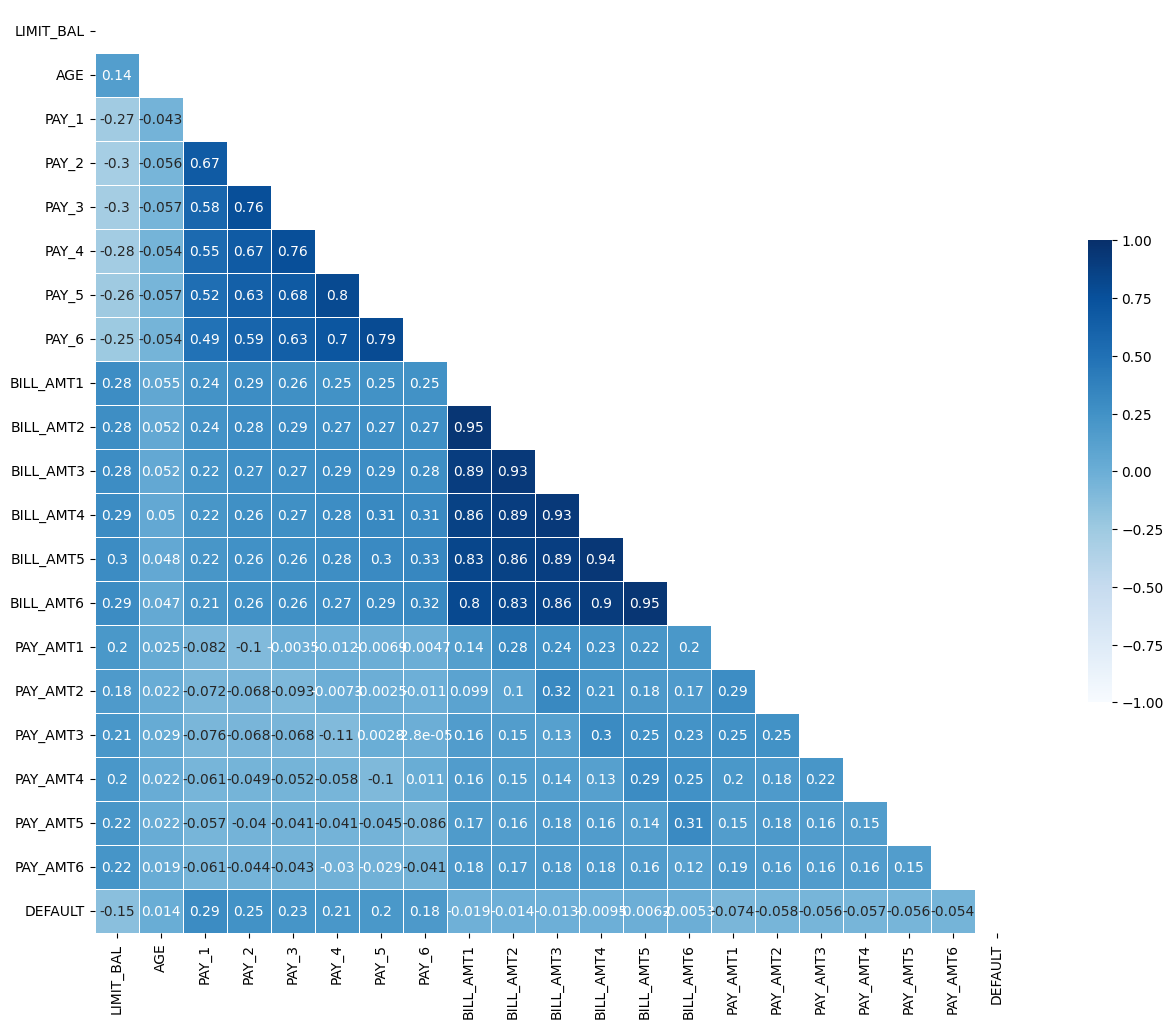

In [ ]:
numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

`BILL_AMTn` 변수들 사이에는 강한 양의 상관관계까 존재하는 것으로 확인됨. 위의 시각화를 통해서 그 사실을 확인할 수 있음.

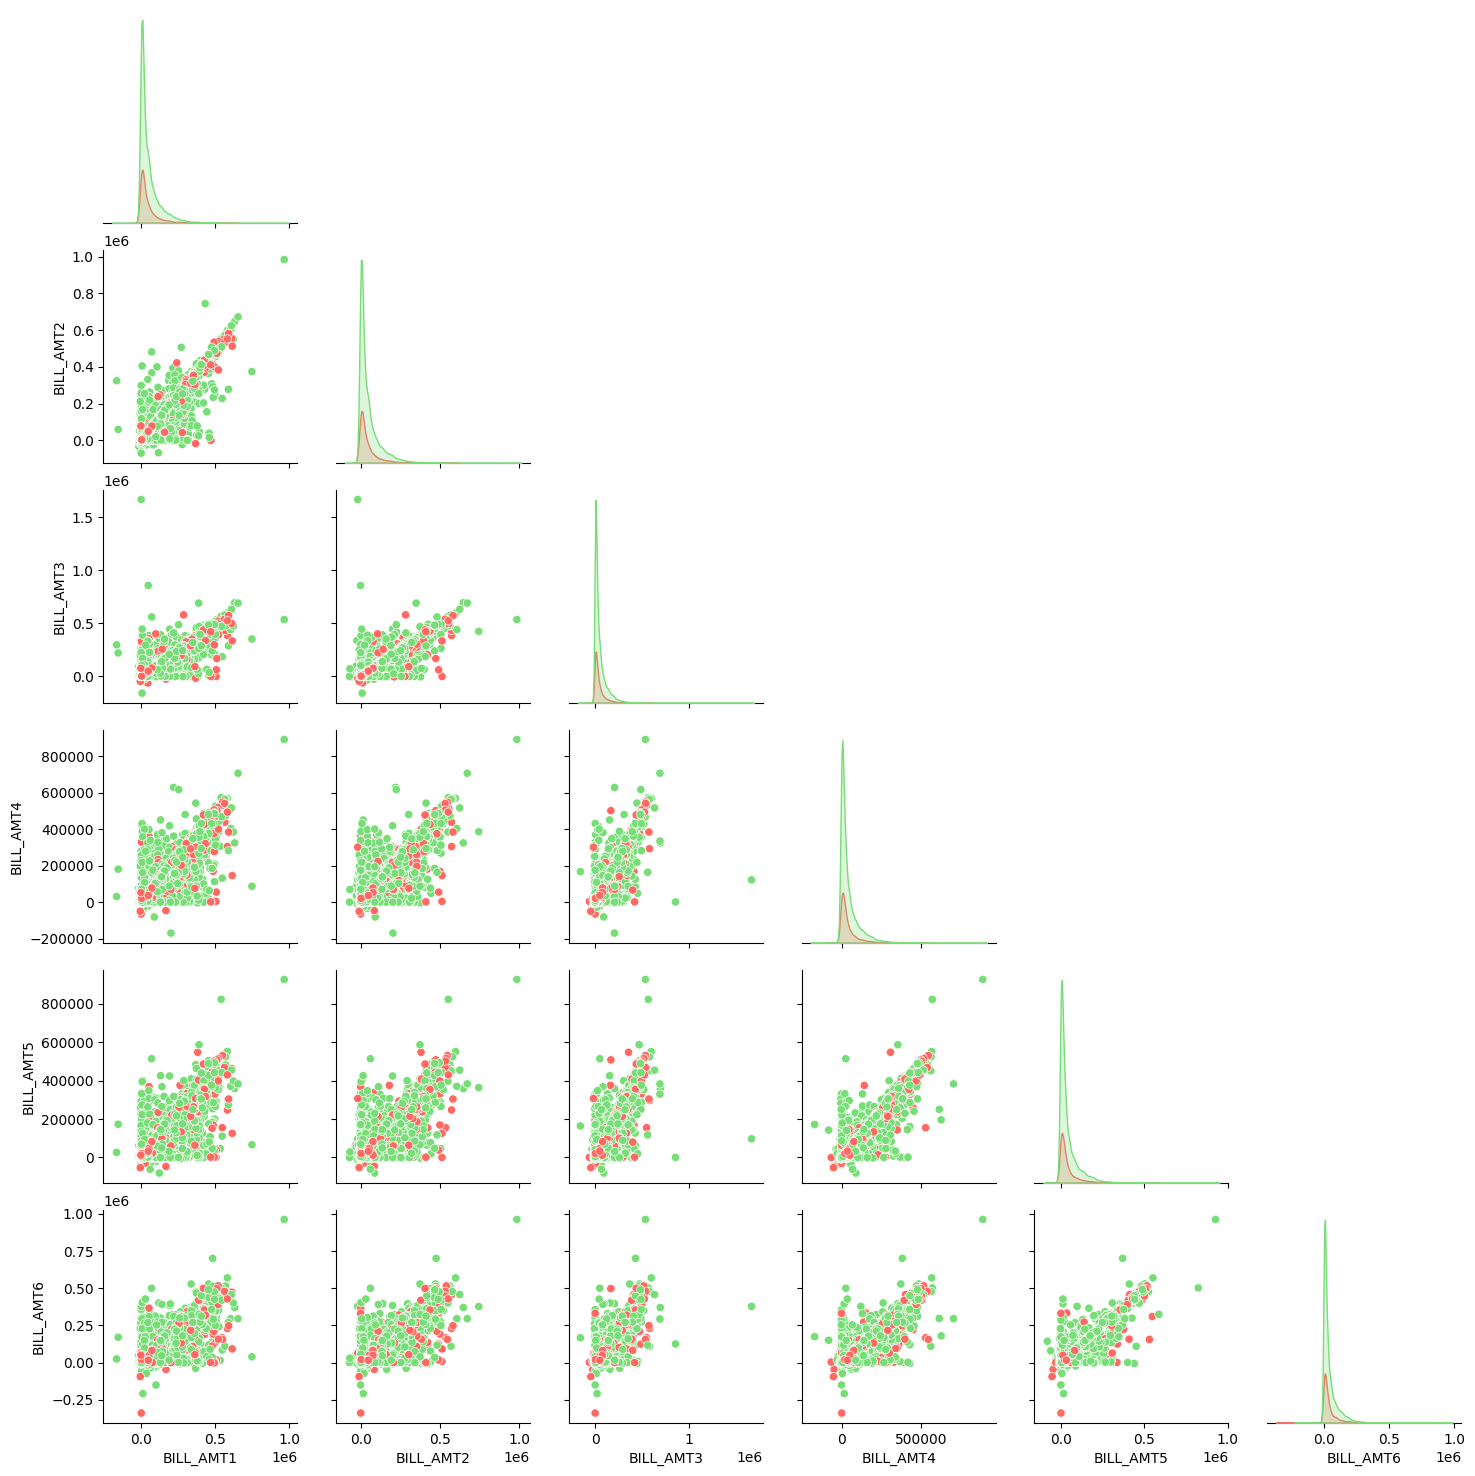

In [ ]:

pair_plot = sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']], hue='DEFAULT', diag_kind='kde', corner=True)
pair_plot._legend.remove()

### 2.5 정규성 검사

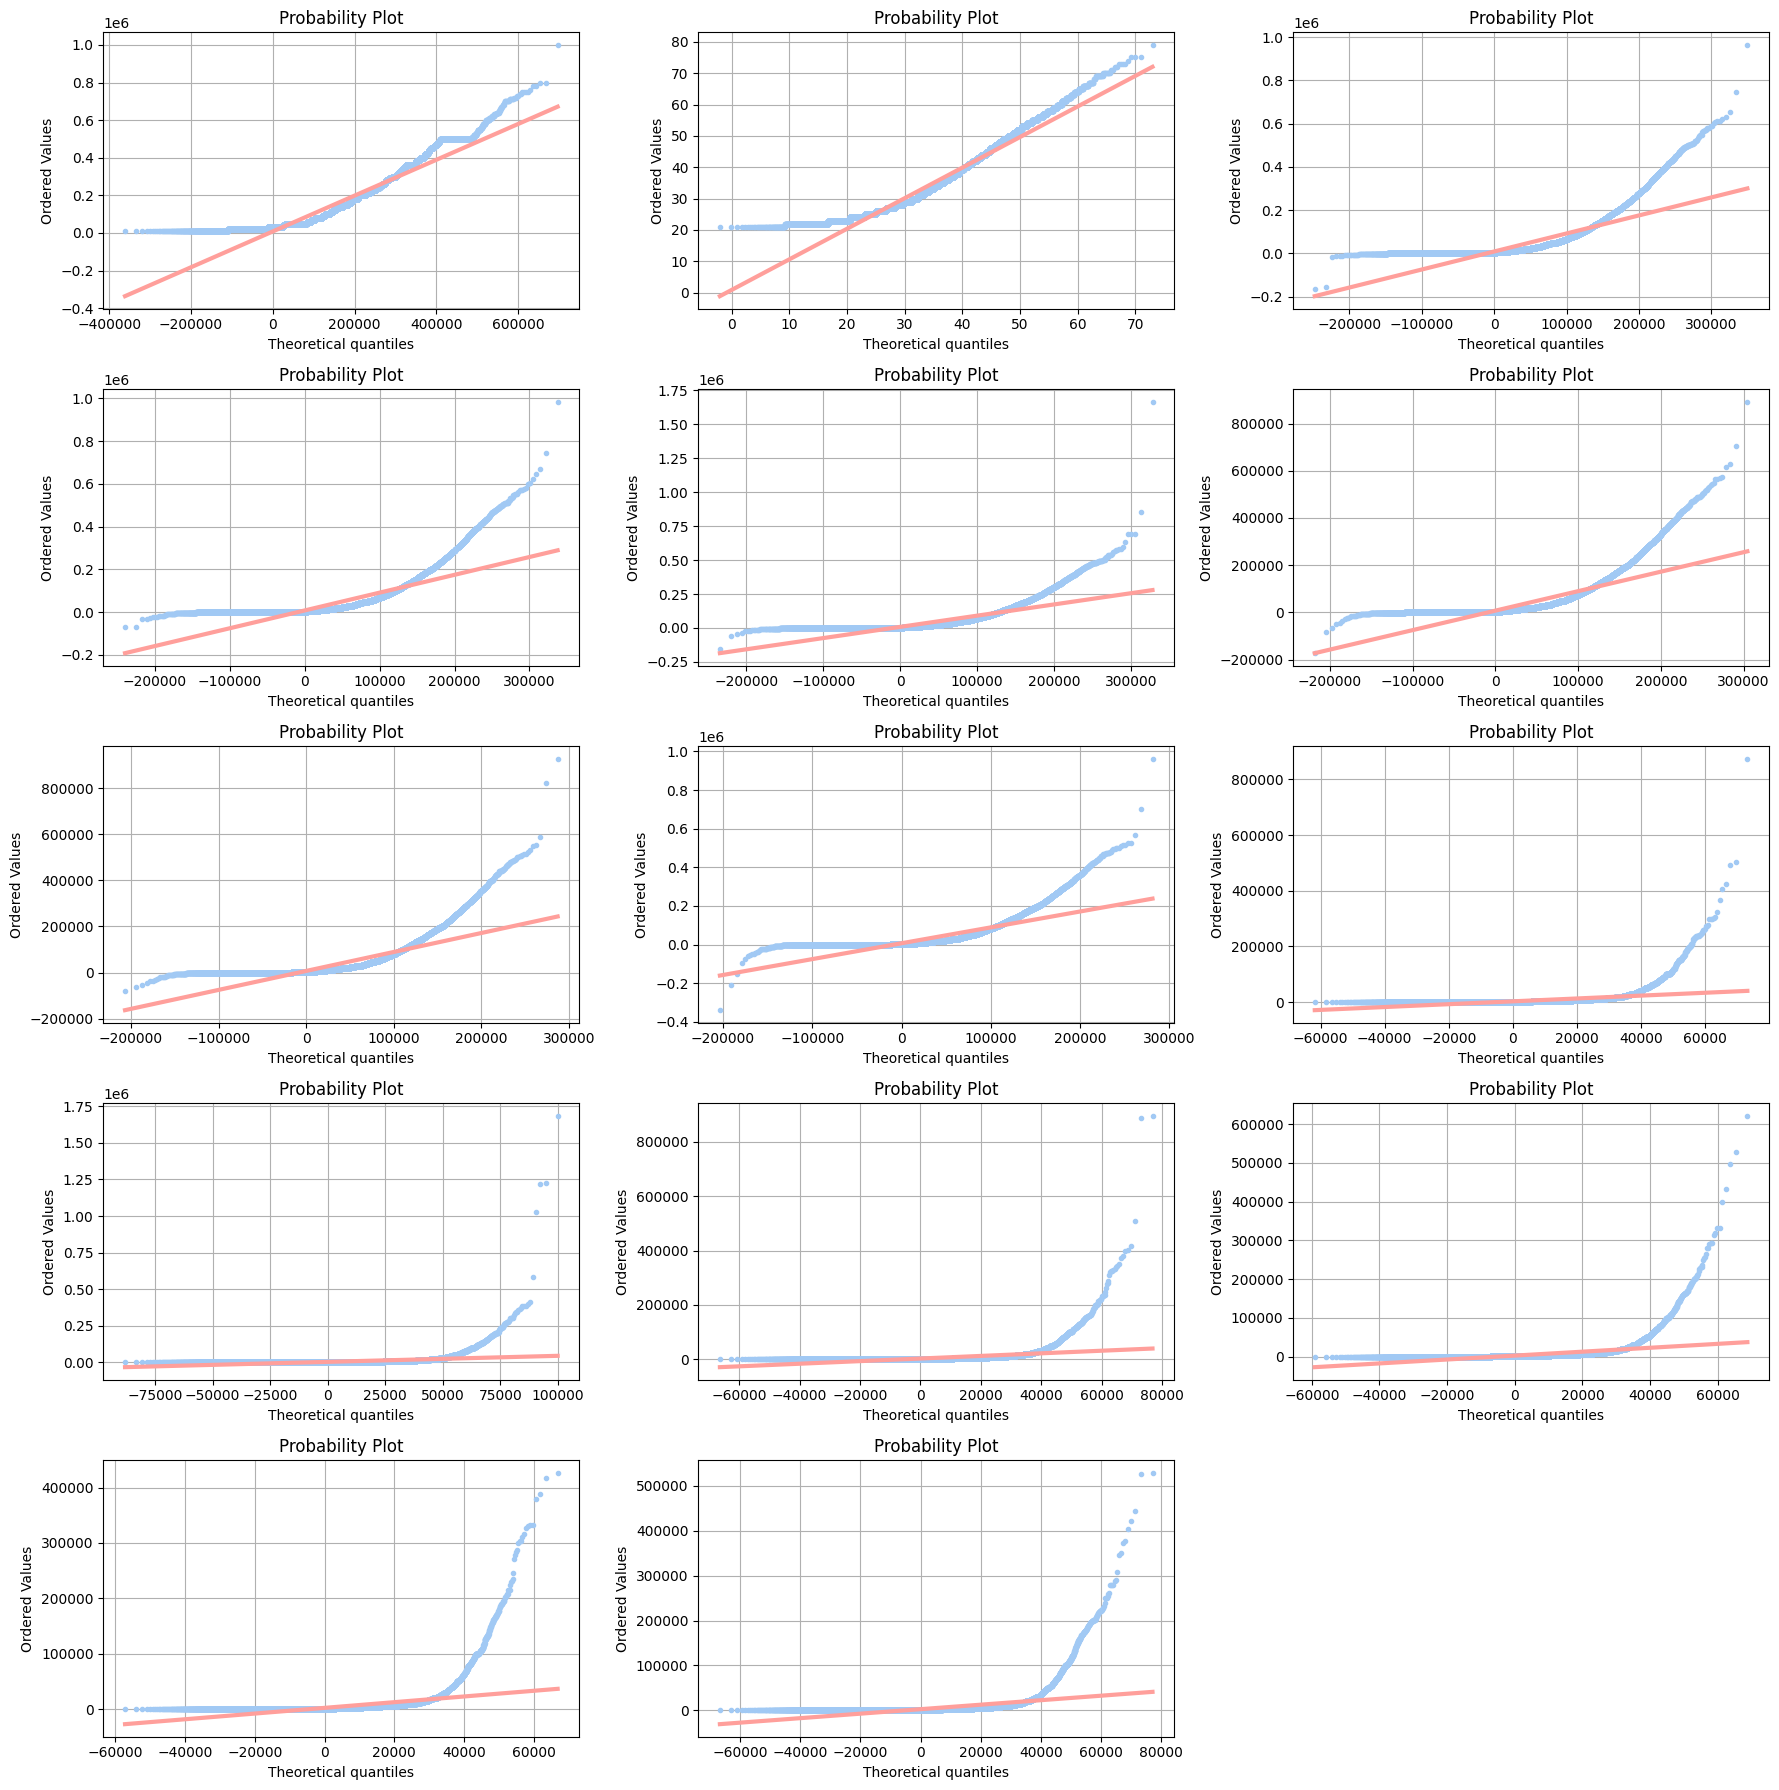

In [ ]:
from scipy import stats

# Check gaussian distribution
sns.set_color_codes('pastel')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f],
                   dist='norm',
                   sparams=(df[f].mean(), df[f].std()),
                   plot=axs[i,j])
    axs[i,j].get_lines()[0].set_marker('.')

    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
plt.show()

QQ-plot이 45도 선 위에 존재하지 않기 때문에 정규성을 따른다고 판단할 수 없다.

## 3. 모델링

## 3.1 범주형 변수

- `EDUCATION`, `SEX`, `MARRIAGE`는 정수로 코딩되어 있음
- 명목형 변수이지만 순서형 변수처럼 코딩되어 있는 상태
- 원핫인코딩을 통해 순서형의 성격을 없앤다. -> 새로운 더미 변수를 만든다

**코딩 방법**
- `MALE`:1=male ; 0=female
- `MARRIED`:1=married marital status; 0=otherwise
- `GRAD_SCHOOL`:1=graduate school level of education;0=otherwise
- `HIGH_SCHOOL`:1=high school level of education;0=otherwise


In [ ]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,0,0,0,0,1,False,True,False,False,True
2,120000,26,-1,3,1,1,1,3,2682,1725,...,1000,1000,0,2000,1,False,True,False,False,False
3,90000,34,1,1,1,1,1,1,29239,14027,...,1000,1000,1000,5000,0,False,True,False,False,False
4,50000,37,1,1,1,1,1,1,46990,48233,...,1200,1100,1069,1000,0,False,True,False,False,True
5,50000,57,-1,1,-1,1,1,1,8617,5670,...,10000,9000,689,679,0,False,True,False,True,True


### 3.2 데이터셋 분할

**트레이닝셋과 테스트셋 분할**
트레이닝셋:테스트셋=3:1

In [ ]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1, inplace=False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)
print('Training set shape: ', np.shape(X_train_raw))
print(f'- Defaulters:\t {len(y_train[y_train==1])}')
print(f'- Non-defaulters: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test_raw))
print(f'- Defaulters:\t {len(y_test[y_test==1])}')
print(f'- Non-defaulters: {len(y_test[y_test==0])}')

Training set shape:  (22200, 25)
- Defaulters:	 4954
- Non-defaulters: 17246
Test set shape:  (7401, 25)
- Defaulters:	 1651
- Non-defaulters: 5750


### 3.3 스케일링

현재까지는 이상치를 제거하지 않음.
정규화는 이상치의 영향을 억제하지만 표준화는 이상치에 대한 정보를 유지하기 때문에 정규화된 데이터를 사용하여 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = MinMaxScaler()
X_train_norm = X_train_raw.copy()
X_test_norm = X_test_raw.copy()

X_train_norm['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_norm['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_norm['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_norm['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    X_train_norm['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_train_norm['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_norm['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

In [ ]:
scaler = StandardScaler()
X_train_std = X_train_raw.copy()
X_test_std = X_test_raw.copy()

X_train_std['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_std['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_std['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_std['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    X_train_std['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_train_std['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_std['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

/tmp/ipython-input-243261864.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(labels=numeric, rotation=25)
/tmp/ipython-input-243261864.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels=numeric, rotation=25)


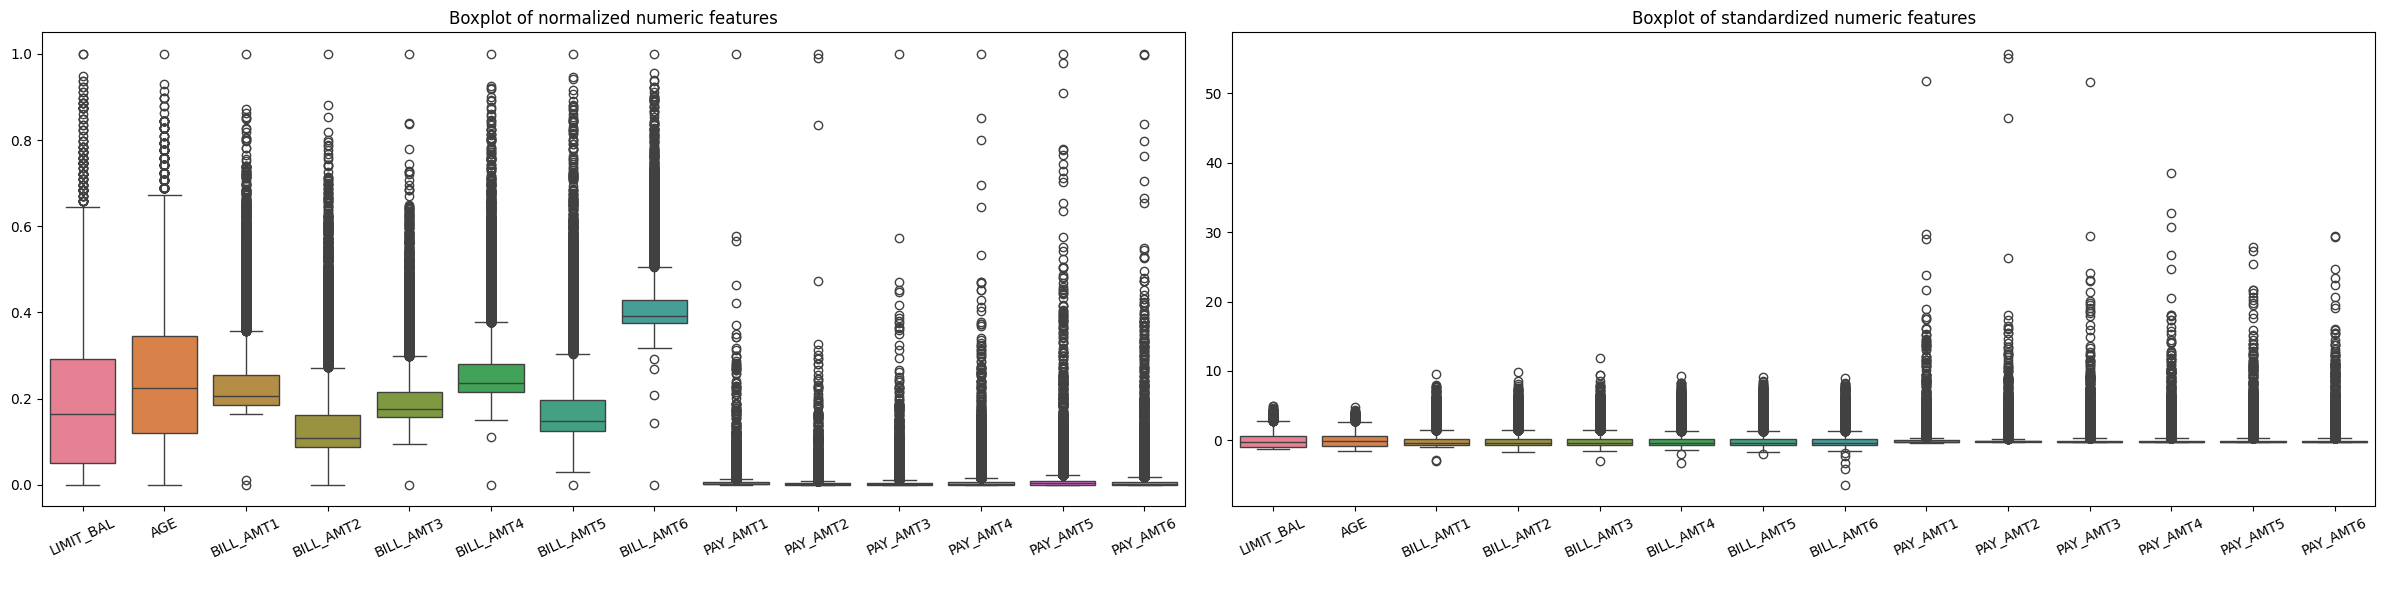

In [ ]:
sns.set_color_codes('deep')
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
fig, axs = plt.subplots(1, 2, figsize=(24,6))

sns.boxplot(data=X_train_norm[numeric], ax=axs[0])
axs[0].set_title('Boxplot of normalized numeric features')
axs[0].set_xticklabels(labels=numeric, rotation=25)
axs[0].set_xlabel(' ')

sns.boxplot(data=X_train_std[numeric], ax=axs[1])
axs[1].set_title('Boxplot of standardized numeric features')
axs[1].set_xticklabels(labels=numeric, rotation=25)
axs[1].set_xlabel(' ')

fig.tight_layout()
plt.show()

### 3.4 차원줄이기
> 2.4에서 강한 상관관계가 있는 것을 확인하였음 <br>
> 목표 : **주성분분석을 통해 차원을 줄여보자**

In [ ]:
from sklearn.decomposition import PCA


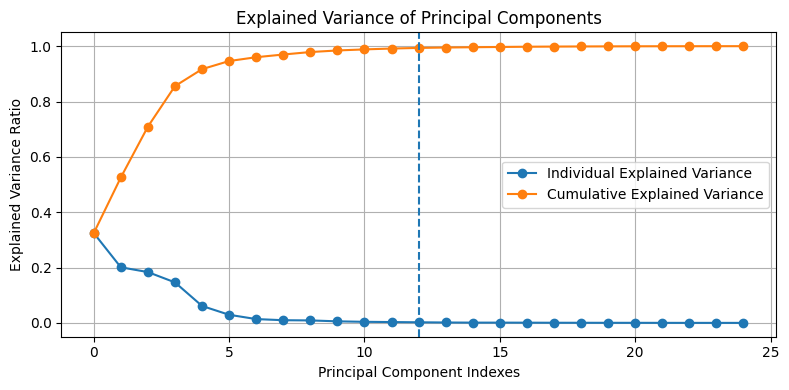

In [ ]:
pc = len(X_train_norm.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.axvline(12, 0, ls='--')
plt.show()

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Cumulative Explained Variance,32.46%,52.56%,70.93%,85.57%,91.69%,94.63%,96.01%,96.98%,97.88%,98.44%,98.84%,99.14%,99.36%,99.51%,99.61%


주성분분석 결과 처음 5개의 주성분이 전체 데이터의 90% 이상을 설명하고 있음을 확인하였다.
하지만 12번째까지의 주성분을 선택해 99% 이상을 설명할 수 있도록 하자. (변수의 수는 절반이 된다.)

In [ ]:

pc = 12
pca = PCA(n_components=pc)
pca.fit(X_train_norm)
X_train = pd.DataFrame(pca.transform(X_train_norm))
X_test = pd.DataFrame(pca.transform(X_test_norm))
X_train.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_test.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_train.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.541856,-0.551393,-0.412480,0.122101,0.238448,0.715080,-0.118730,-0.217807,-0.089929,-0.010003,-0.012406,0.002596
1,0.499287,-0.532587,-0.456984,0.088489,-0.464270,0.046294,-0.005356,-0.012562,-0.043945,-0.027395,0.004628,-0.006394
2,-0.832777,-0.331479,-0.471075,-0.018672,0.173999,0.077012,-0.117121,-0.145521,0.023793,-0.052872,0.009305,0.071040
3,-0.863633,-0.282837,-0.492387,-0.059972,-0.293545,-0.108782,0.099432,-0.142524,-0.090122,-0.036494,0.002218,-0.010245
4,0.474527,-0.631709,0.548848,0.022170,-0.370284,0.012118,0.082537,-0.129728,0.140121,0.031074,0.067107,-0.071883


### 3.5 층위의 불균형 해결
> 2.3을 통해 층위에 불균형이 있음을 확인. 그것을 해결해보는 단계

In [ ]:
class_count = [y_train[y_train == 0].count(), y_train[y_train == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion')
class_count_df

Training set class proportion


,Number,Percentage
Non-defaulters,17246,77.68%
Defaulters,4954,22.32%


단순한 업샘플링 방식은 제외. 원하는 비율을 얻을 때까지 무작위로 소수 클래스 데이터를 중복하거나 다수 클래스 데이터를 삭제하기 때문.
- 무작위 다운샘플링은 어떤 정보가 삭제되는지 통제할 수 없다는 단점
- 무작위 업샘플링은 동일한 데이터를 반복적으로 학습하기 때문에 과적합을 초래. <br>
-> **클러스터 중심 방법**

### 3.5.1 클러스터 샘플로이드 업샘플링
> 'Centroid'(센트로이드)는 한국어로 **도심**이라고 하며, 주어진 도형의 모든 점들의 산술 평균 위치를 의미하는 기하학적 중심<br>
> K-평균 알고리즘


In [ ]:
from imblearn.under_sampling import ClusterCentroids


In [ ]:
oversample = ClusterCentroids(random_state=24)
X_train_cc, y_train_cc = oversample.fit_resample(X_train, y_train)

In [ ]:
class_count = [y_train_cc[y_train_cc == 0].count(), y_train_cc[y_train_cc == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after Cluster Centroid Undersampling')
class_count_df

# non-defaulters 4954
# defaulters 4954

Training set class proportion after Cluster Centroid Undersampling


,Number,Percentage
Non-defaulters,4954,50.00%
Defaulters,4954,50.00%


### 3.5.2 SMOTE (Synthetic Minority Oversmapling Technique)
> 기존 minority class의 데이터 포인트들 사이에서 새로운 데이터를 생성 -> 더 일반화된 패턴을 학습할 수 있음

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state=24)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after SMOTE Oversampling')
class_count_df

# non-defaulters 17246
# defaulters 17246

Training set class proportion after SMOTE Oversampling


,Number,Percentage
Non-defaulters,17246,50.00%
Defaulters,17246,50.00%


In [ ]:
(df == "").sum().sum()       # 빈 문자열 개수
(df == "NA").sum().sum()     # "NA"라는 문자열 개수
(df == "?").sum().sum()      # "?" 개수

np.int64(0)

### 3.5.3 K-평균 SMOTE

In [ ]:
from imblearn.over_sampling import KMeansSMOTE

In [ ]:

oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)
X_train_ksmote, y_train_ksmote = oversample.fit_resample(X_train, y_train)

In [ ]:
class_count = [y_train_ksmote[y_train_ksmote == 0].count(), y_train_ksmote[y_train_ksmote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after K-means SMOTE Oversampling')
class_count_df

Training set class proportion after K-means SMOTE Oversampling


,Number,Percentage
Non-defaulters,17246,49.99%
Defaulters,17252,50.01%


In [ ]:
y_list = [y_train, y_train_cc, y_train_smote]
y_list_labels = ['No resampling', 'Cluster Centroids', 'SMOTE']

plt.figure(figsize=(14,4))

i = 1
for value, label in zip(y_list,y_list_labels):
    plt.subplot(1,4,i)
    graph_target = sns.countplot(value, palette=['#77DD76','#FF6962'])
    plt.xlabel(label, fontdict= {"size":15})
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    j=0
    for p in graph_target.patches:
        height = p.get_height()

        str_plot = f'{round(100 * value.value_counts()[j]/len(value),2)} %'

        graph_target.text(p.get_x()+p.get_width()/2., height + 100 , str_plot, ha="center", fontsize = 13)
        j += 1

    i += 1
    graph_target.set_ylim(0, 20000)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2533568155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph_target = sns.countplot(value, palette=['#77DD76','#FF6962'])
/tmp/ipython-input-2533568155.py:9: UserWarning: 
The palette list has fewer values (2) than needed (22200) and will cycle, which may produce an uninterpretable plot.
  graph_target = sns.countplot(value, palette=['#77DD76','#FF6962'])


KeyError: 2

Error in callback <function _draw_all_if_interactive at 0x7ca09fe11300> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ca09ffe2840> (for post_execute):


KeyboardInterrupt: 

# 4. 모델

분류 모델들을 사용할 예정

### 4.1. 로지스틱 회귀

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.804216,0.739336,0.188976,0.301013,0.584923


<Axes: >

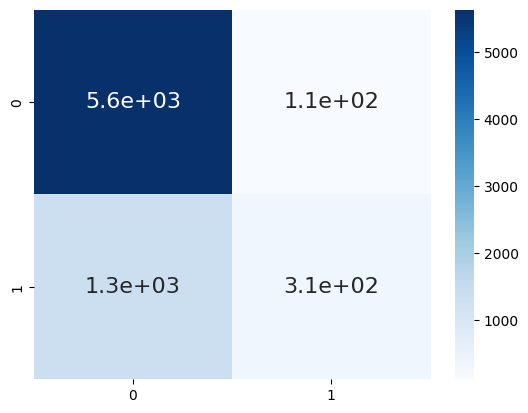

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 4.2 랜덤 포레스트

In [ ]:
#Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.807729,0.616803,0.364627,0.458317,0.649792


<Axes: >

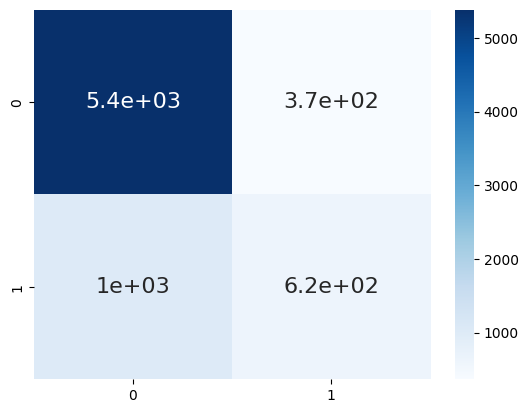

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 4.3 XGBoost

In [ ]:
#Apply XGBoost classifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred =xgb.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.811917,0.630676,0.378558,0.473126,0.657453


<Axes: >

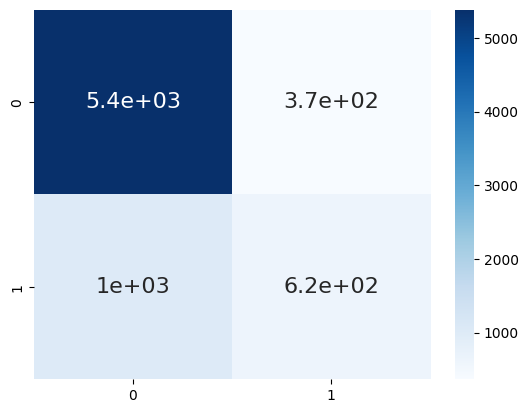

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## 결과 분석
**accuracy**를 기준으로 보았을 때


1.   로지스틱 회귀 : 0.8054
2.   랜덤 포레스트 : 0.8173
3.   XGBoost : 0.8196



accuracy : 정확도 ; 전체 예측한 것 중에 올바른 예측을 얼마나 했는지를 나타냄